# **Data Loading and File Handling**

In [25]:
import pandas as pd
import os

dataframes = {}
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        if filename.endswith('.csv'):
            filepath = os.path.join(dirname, filename)
            df = pd.read_csv(filepath)
            dataframes[filename] = df
            print(f"Loaded: {filename}, Shape: {df.shape}")

Loaded: cwurData.csv, Shape: (2200, 14)
Loaded: educational_attainment_supplementary_data.csv, Shape: (79055, 29)
Loaded: education_expenditure_supplementary_data.csv, Shape: (333, 9)
Loaded: school_and_country_table.csv, Shape: (818, 2)
Loaded: shanghaiData.csv, Shape: (4897, 11)
Loaded: timesData.csv, Shape: (2603, 14)


In [93]:
data = pd.read_csv('input/timesData.csv')
data.head(15)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

# **Cleaning data**

## **Correcting country names safely**

In [144]:
country_correction = {
    'Unisted States of America': 'United States of America',
    'Unted Kingdom': 'United Kingdom'
}

data['country'] = data['country'].replace(country_correction)
print(data['country'].unique())

['United States of America' 'United Kingdom' 'Switzerland' 'Canada'
 'Hong Kong' 'Japan' 'South Korea' 'Singapore' 'Australia' 'China'
 'France' 'Sweden' 'Germany' 'Republic of Ireland' 'Finland' 'Taiwan'
 'South Africa' 'Turkey' 'Netherlands' 'Belgium' 'Denmark' 'Norway'
 'Spain' 'New Zealand' 'Egypt' 'Austria' 'Israel' 'Brazil' 'Italy'
 'Russian Federation' 'Greece' 'Iceland' 'Czech Republic' 'India' 'Poland'
 'Iran' 'Portugal' 'Thailand' 'Chile' 'Estonia' 'Saudi Arabia' 'Mexico'
 'Colombia' 'Macau' 'Morocco' 'Luxembourg' 'Cyprus' 'Uganda' 'Malaysia'
 'Lebanon' 'Romania' 'Slovenia' 'Pakistan' 'Hungary'
 'United Arab Emirates' 'Belarus' 'Serbia' 'Slovakia' 'Bangladesh' 'Ghana'
 'Nigeria' 'Indonesia' 'Jordan' 'Latvia' 'Kenya' 'Argentina' 'Qatar'
 'Oman' 'Ukraine' 'Lithuania']


## **Correcting the ranking system**

In [147]:
# We will focus on the top 200 entries from the world rank data for each year, excluding data with rankings beyond this range. With this we are going to get rid of values like 201-300
data2011 = data[data['year'] == 2011].iloc[:200,:]
data2012 = data[data['year'] == 2012].iloc[:200,:]
data2013 = data[data['year'] == 2013].iloc[:200,:]
data2014 = data[data['year'] == 2014].iloc[:200,:]
data2015 = data[data['year'] == 2015].iloc[:200,:]
data2016 = data[data['year'] == 2016].iloc[:200,:]

new_data = pd.concat([data2011,data2012,data2013,data2014,data2015,data2016],axis=0)
# Some of the values has "=" inside of refering to some ranks are the same we will get rid of it
new_data['world_rank'] = new_data['world_rank'].str.replace("=", "", regex=False).astype(int)

# Print the cleaned data
print(new_data)

      world_rank                        university_name  \
0              1                     Harvard University   
1              2     California Institute of Technology   
2              3  Massachusetts Institute of Technology   
3              4                    Stanford University   
4              5                   Princeton University   
...          ...                                    ...   
1998         196                   Newcastle University   
1999         196      St George’s, University of London   
2000         198                   University of Trento   
2001         199     Paris Diderot University – Paris 7   
2002         200             Queen’s University Belfast   

                       country  teaching international  research  citations  \
0     United States of America      99.7          72.4      98.7       98.8   
1     United States of America      97.7          54.6      98.0       99.9   
2     United States of America      97.8          82.3

## **Fixing the international students values and removing "%" then changing value to a float**

In [150]:
new_data['international_students'] = new_data['international_students'].str.replace("%", "", regex=False).astype(float)

# Display the cleaned data
print(new_data[['university_name', 'international_students']])

                            university_name  international_students
0                        Harvard University                    25.0
1        California Institute of Technology                    27.0
2     Massachusetts Institute of Technology                    33.0
3                       Stanford University                    22.0
4                      Princeton University                    27.0
...                                     ...                     ...
1998                   Newcastle University                    29.0
1999      St George’s, University of London                    17.0
2000                   University of Trento                     8.0
2001     Paris Diderot University – Paris 7                    17.0
2002             Queen’s University Belfast                    30.0

[1200 rows x 2 columns]


## **Fixing female to male ratio values and changing the type**

In [153]:
new_data['female_male_ratio'] = new_data['female_male_ratio'].astype(str)

# Check if the ratio contains ':', indicating it's in the 'female:male' format
if new_data['female_male_ratio'].str.contains(':').any():
    # Split the female_male_ratio into two columns
    new_data[['female_ratio', 'male_ratio']] = new_data['female_male_ratio'].str.split(':', expand=True)
    
    # Convert both columns to numeric, coercing errors to NaN
    new_data['female_ratio'] = pd.to_numeric(new_data['female_ratio'], errors='coerce')
    new_data['male_ratio'] = pd.to_numeric(new_data['male_ratio'], errors='coerce')
    
    # Calculate the female-to-male ratio
    new_data['female_to_male_ratio'] = new_data['female_ratio'] / new_data['male_ratio']
else:
    # If the ratio is already a single numeric value, convert it directly
    new_data['female_male_ratio'] = pd.to_numeric(new_data['female_male_ratio'], errors='coerce')
    new_data['female_to_male_ratio'] = new_data['female_male_ratio']

# Step 2: Display the cleaned data with university name and calculated female-to-male ratio
print(new_data[['university_name', 'female_to_male_ratio']])

                            university_name  female_to_male_ratio
0                        Harvard University                   NaN
1        California Institute of Technology              0.492537
2     Massachusetts Institute of Technology              0.587302
3                       Stanford University              0.724138
4                      Princeton University              0.818182
...                                     ...                   ...
1998                   Newcastle University              1.000000
1999      St George’s, University of London              1.564103
2000                   University of Trento              1.040816
2001     Paris Diderot University – Paris 7              1.702703
2002             Queen’s University Belfast              1.173913

[1200 rows x 2 columns]


## **Function to remove native characters**

In [155]:
import unicodedata
def normalize(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')

# Apply the normalization to the 'university_name' column
new_data['university_name'] = new_data['university_name'].apply(normalize)

# Display the cleaned data
print(new_data[['university_name']])

                            university_name
0                        Harvard University
1        California Institute of Technology
2     Massachusetts Institute of Technology
3                       Stanford University
4                      Princeton University
...                                     ...
1998                   Newcastle University
1999       St Georges, University of London
2000                   University of Trento
2001      Paris Diderot University  Paris 7
2002              Queens University Belfast

[1200 rows x 1 columns]


## **Fixing other values and changing the type**

In [71]:
import numpy as np  # Importing numpy
new_data["income"] = new_data["income"].replace("-", np.nan)
new_data["income"] = new_data["income"].astype(float)
new_data["total_score"] = new_data["total_score"].astype(float)
new_data["international"] = new_data["international"].replace("-", np.nan)
new_data["international"] = new_data["international"].astype(float)
new_data["international_students"] = new_data["international_students"].astype(float)
new_data["num_students"] = new_data["num_students"].str.replace(",", "").astype(float)

# Removing NaN values
new_data = new_data.dropna()

# Display the cleaned data
print(new_data)

      world_rank                        university_name  \
1              2     California Institute of Technology   
2              3  Massachusetts Institute of Technology   
3              4                    Stanford University   
5              6                University of Cambridge   
6              6                   University of Oxford   
...          ...                                    ...   
1998         196                   Newcastle University   
1999         196       St Georges, University of London   
2000         198                   University of Trento   
2001         199      Paris Diderot University  Paris 7   
2002         200              Queens University Belfast   

                       country  teaching  international  research  citations  \
1     United States of America      97.7           54.6      98.0       99.9   
2     United States of America      97.8           82.3      91.4       99.9   
3     United States of America      98.3           

# **Algorithms/Models**

## **K-Means Clustering**

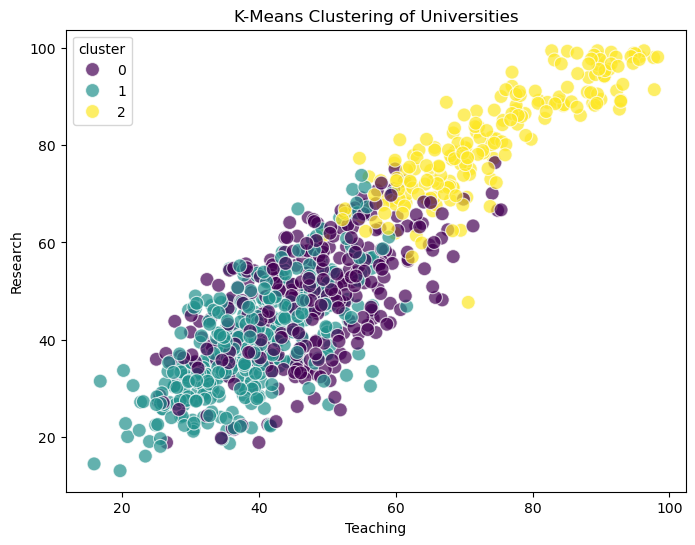

      Cluster  teaching  research  citations  international
1           2      97.7      98.0       99.9           54.6
2           2      97.8      91.4       99.9           82.3
3           2      98.3      98.1       99.2           29.5
5           2      90.5      94.1       94.0           77.7
6           2      88.2      93.9       95.1           77.2
...       ...       ...       ...        ...            ...
1998        1      30.9      27.5       81.5           84.3
1999        1      25.6      18.1      100.0           69.5
2000        1      30.8      27.4       87.7           55.9
2001        1      30.5      22.9       91.0           64.9
2002        1      34.1      33.3       68.9           93.4

[953 rows x 5 columns]


In [101]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assume 'new_data' is the DataFrame that contains the data

# Selecting relevant columns for clustering (adjust as per your dataset)
features = new_data[['teaching', 'research', 'citations', 'international']]

# Standardizing the data (important for K-Means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters as needed
new_data['cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters with respect to 'teaching' and 'research'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_data['teaching'], y=new_data['research'], hue=new_data['cluster'], palette='viridis', s=100, alpha=0.7)
plt.title("K-Means Clustering of Universities")
plt.xlabel("Teaching")
plt.ylabel("Research")
plt.show()

# Adding the 'Cluster' column to the DataFrame and displaying selected features
new_data['Cluster'] = kmeans.fit_predict(scaled_features)
# Displaying the DataFrame with 'Cluster' column and features
print(new_data[['Cluster'] + list(features.columns)])

## **Linear Regression**

Mean Squared Error: 2.54
R2 Score: 0.98


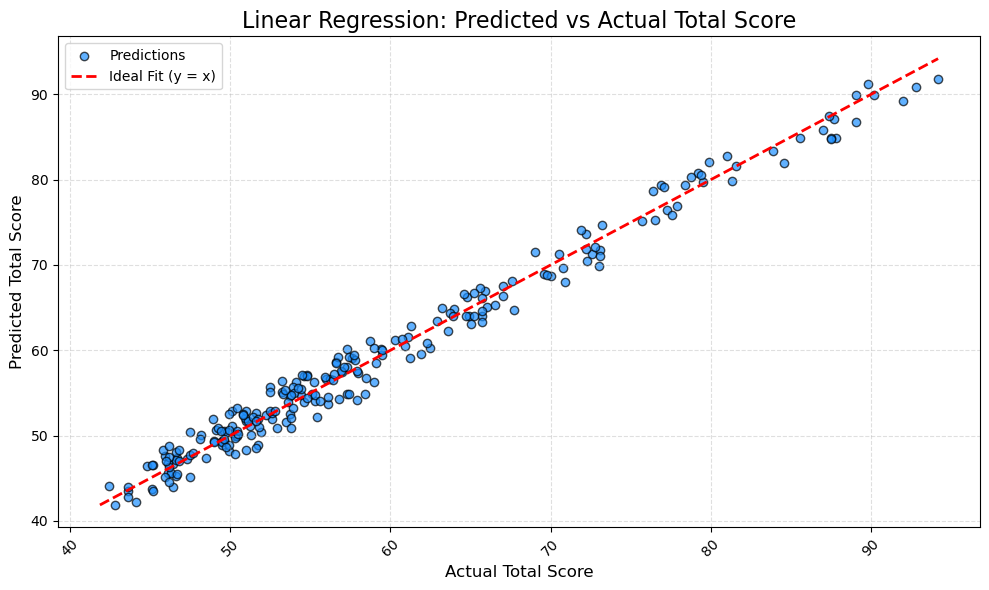

In [194]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

new_data['total_score'] = pd.to_numeric(new_data['total_score'], errors='coerce')
new_data = new_data.dropna(subset=['total_score'])

X = new_data[['teaching', 'research', 'citations']]
y = new_data['total_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7, edgecolors='k', label='Predictions')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y = x)')

plt.title('Linear Regression: Predicted vs Actual Total Score', fontsize=16)
plt.xlabel('Actual Total Score', fontsize=12)
plt.ylabel('Predicted Total Score', fontsize=12)

plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

## **Random Forest Regressor**

Mean Squared Error: 3.12
R2 Score: 0.98


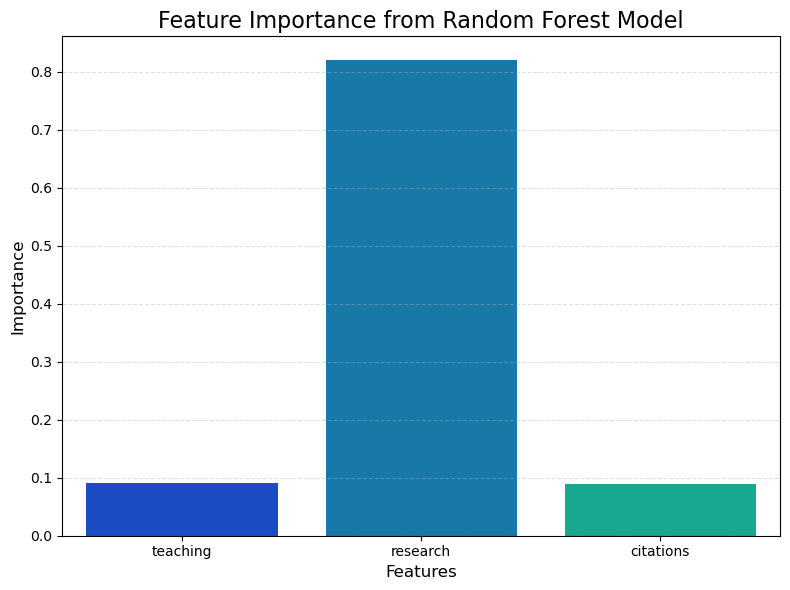

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Use only selected features
X = new_data[['teaching', 'research', 'citations']]
y = new_data['total_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_rf_pred = rf_model.predict(X_test)

# Evaluation
print(f"Mean Squared Error: {mean_squared_error(y_test, y_rf_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_rf_pred):.2f}")

# Feature Importance
feature_importances = rf_model.feature_importances_
features = X.columns

# Plotting with gradient color palette
# Plotting with gradient color palette (future-proofed)
colors = sns.color_palette("winter", len(features))

plt.figure(figsize=(8, 6))
sns.barplot(x=features, y=feature_importances, hue=features, palette=colors, legend=False)

plt.title("Feature Importance from Random Forest Model", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# **Visualization Techniques**

## **Pair Plot**

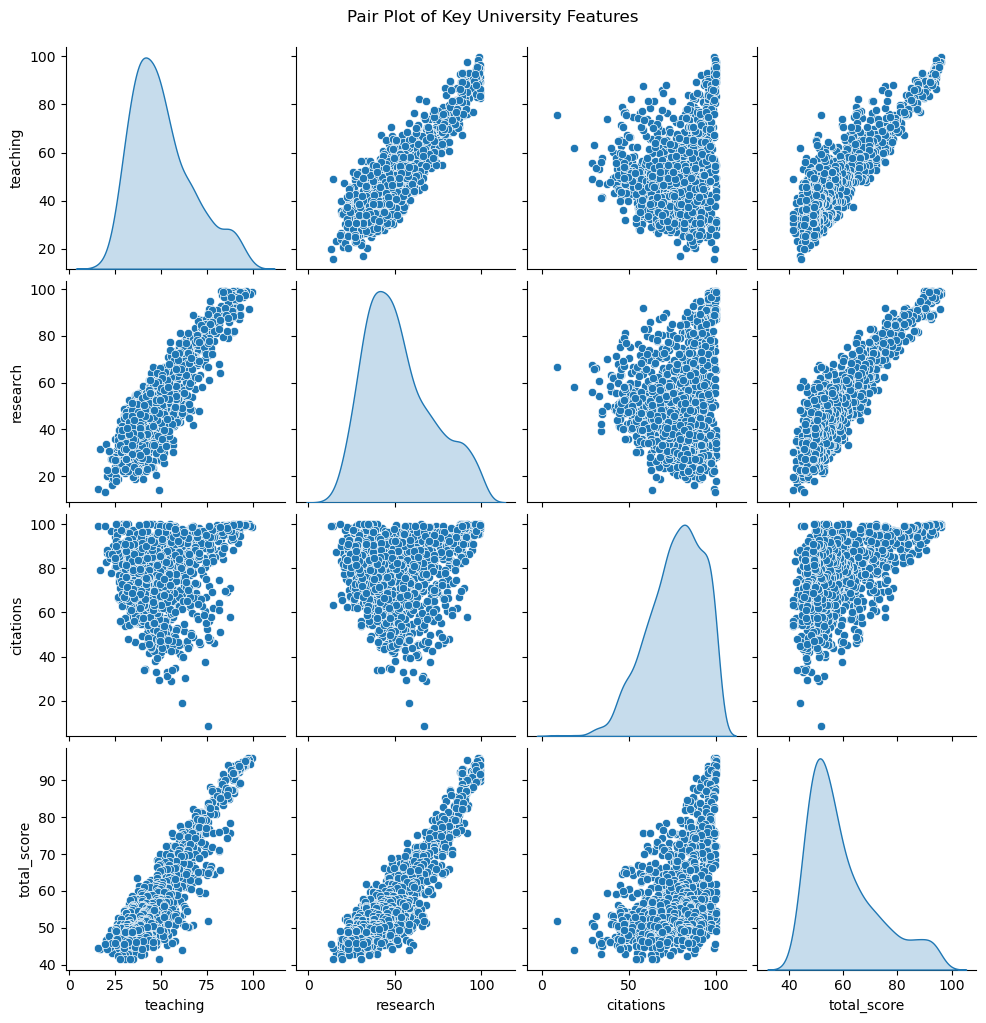

In [211]:
import seaborn as sns

# Pair plot to visualize relationships between key features
sns.pairplot(new_data[['teaching', 'research', 'citations', 'international', 'total_score']], diag_kind='kde')
plt.suptitle("Pair Plot of Key University Features", y=1.02)
plt.show()


## **Heatmap**

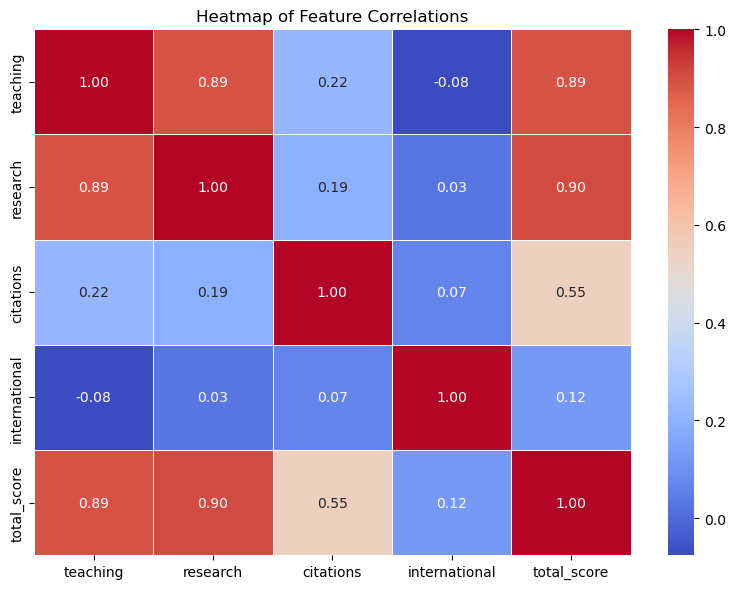

In [220]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_clean = ['teaching', 'research', 'citations', 'international', 'total_score']
new_data[columns_to_clean] = new_data[columns_to_clean].replace('-', np.nan)

# Convert columns to numeric (this will convert valid strings to float and keep NaNs)
new_data[columns_to_clean] = new_data[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaNs in the selected columns for correlation
corr_data = new_data[columns_to_clean].dropna()

# Calculate correlation matrix
correlation_matrix = corr_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.tight_layout()
plt.show()

## **Scatter Plot**

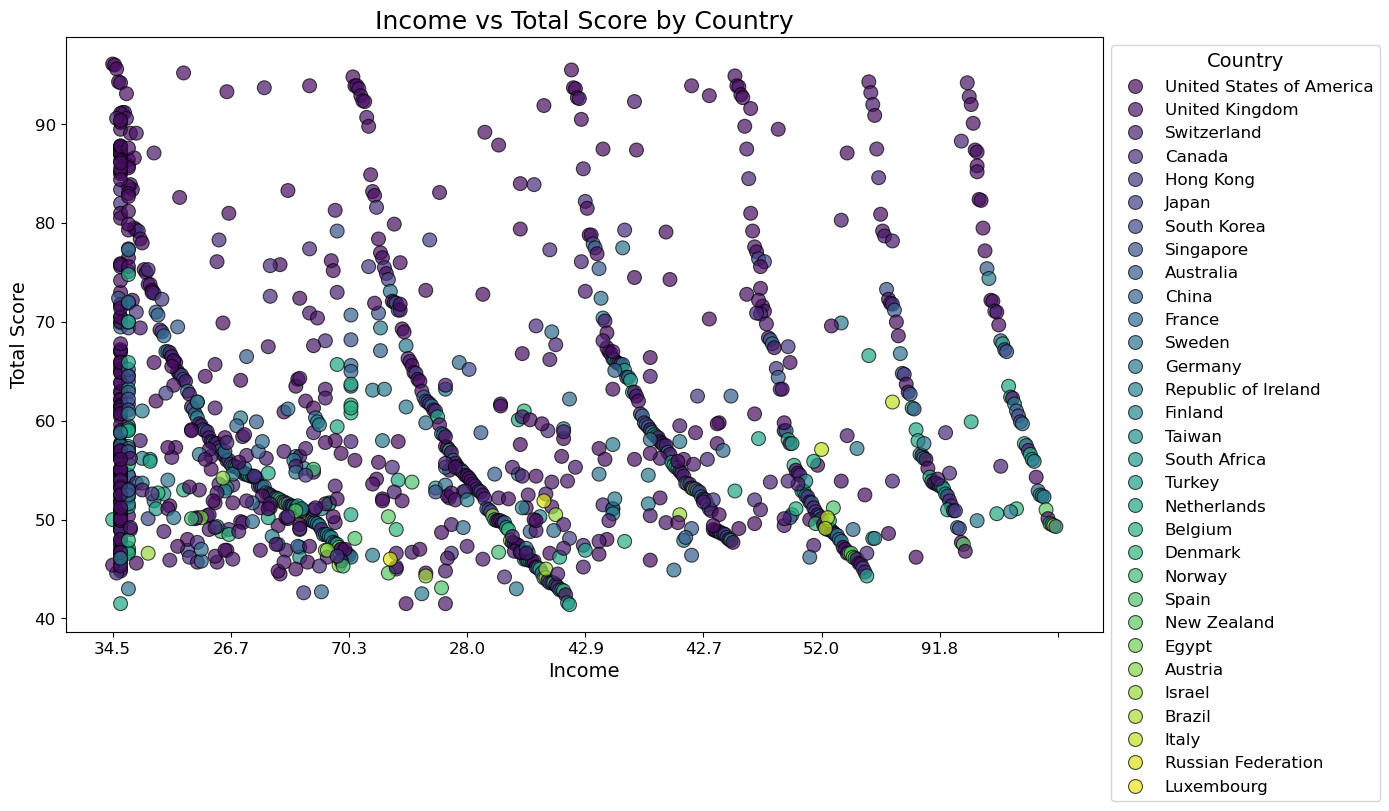

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(14, 8))  # Increase figure size for better clarity

# Scatter plot
sns.scatterplot(
    x=new_data['income'], 
    y=new_data['total_score'], 
    hue=new_data['country'], 
    palette='viridis', 
    s=100, 
    alpha=0.7, 
    edgecolor='black'
)

# Customizing the plot
plt.title("Income vs Total Score by Country", fontsize=18)
plt.xlabel("Income", fontsize=14)
plt.ylabel("Total Score", fontsize=14)

# Set x-axis ticks to show better spacing
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))

# Adjust y-axis tick font size
plt.yticks(fontsize=12)

# Remove x-axis label rotation for numeric clarity
plt.xticks(rotation=0, fontsize=12)

# Adjust the legend for better visibility
plt.legend(title='Country', title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.tight_layout()
plt.show()

## **Bar Plot**

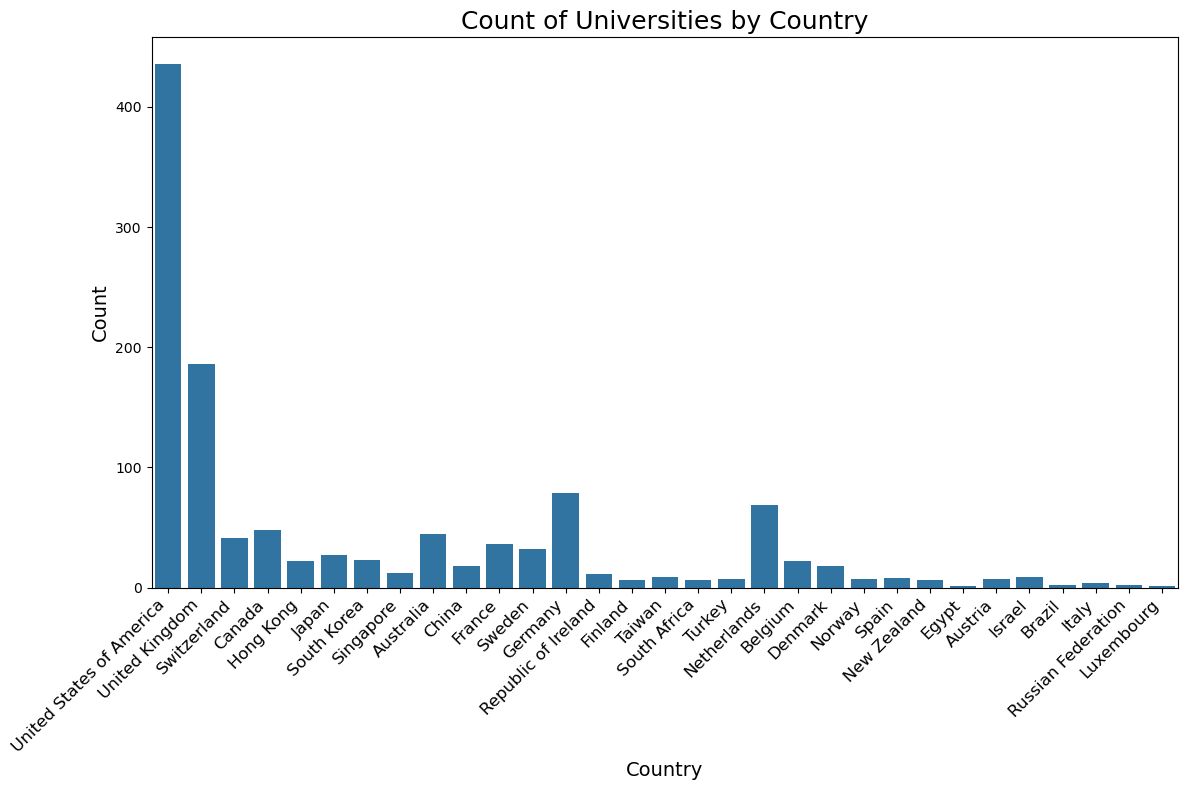

In [252]:
plt.figure(figsize=(12, 8)) 
sns.countplot(x='country', data=new_data)

# Customizing the plot
plt.title("Count of Universities by Country", fontsize=18)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout to ensure the labels fit and the plot is not cropped
plt.tight_layout()

# Show plot
plt.show()